In [40]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

dataset = pd.read_csv('Heart Failure data.csv')
dataset = shuffle(dataset)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1


Text(0.5, 1.0, 'Amount of heart failures')

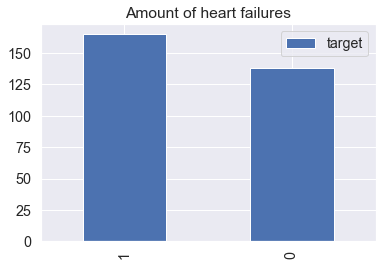

In [41]:
dataset['target'].value_counts().plot(kind='bar',legend=True,orientation='vertical')
plt.title('Amount of heart failures')

In [42]:
dataset_copy = dataset.copy(deep = True)
column_names =  ['age', 'sex', 'cp','trestbps','col','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
numeric_column_names = ['age','trestbps','chol','thalach','oldpeak']
#The numeric columns are changed on the basis of personal understanding
#and from a little research on the internet because no additional
dataset.loc[(dataset['age'] < 40) | (dataset['age'] > 95)]
dataset.loc[(dataset['trestbps'] < 120) | (dataset['trestbps'] > 120)]
dataset.loc[(dataset['chol'] < 200) | (dataset['chol'] > 200)]
dataset.loc[(dataset['thalach'] < 154) | (dataset['thalach'] > 154)]
dataset.loc[(dataset['oldpeak'] < 2) | (dataset['oldpeak'] > 2.55)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1


In [43]:
attr = len(dataset.columns) - 1

X = dataset.iloc[:, 0:attr]
y = dataset.iloc[:, attr]

#----splitting-----
split_pct = int(0.8 * len(dataset))
#20 80 split for test and train data
train_X = X[:split_pct]
test_X = X[split_pct:]

train_y = y[:split_pct] 
test_y = y[split_pct:]
print(test_y)
#----standardaizing--------
train_X_mean = train_X.mean()
train_X_std = train_X.std()

train_X = (train_X - train_X_mean )/ train_X_std
test_X = (test_X - train_X_mean)/train_X_std

290    0
42     1
254    0
224    0
117    1
      ..
210    0
80     1
252    0
119    1
2      1
Name: target, Length: 61, dtype: int64


In [44]:
#KNN, functions from the internet
def euclidean_distance(sample1, sample2):
  distance = 0.0
  for i in range(len(sample1)):
    distance += ((sample1[i] - sample2[i]) ** 2)
  return sqrt(distance)

def get_neighbors(test_row, K):
  distances = list()
  for i in range(len(train_X)): 
    dist = euclidean_distance(test_row, train_X.iloc[i])
    distances.append((i, dist))
  distances.sort(key=lambda tup: tup[1])
 
  neighbors_idx = []
  for index, tuple in enumerate(distances):
    neighbors_idx.append(tuple[0])
 
  return neighbors_idx[:K]

def update_confusion_matrix(cm, actual_outcome, pred_outcome):
  cm[actual_outcome][pred_outcome] += 1
  return cm

def predict_outcome(neighbors_class):
  if neighbors_class.count(max(neighbors_class)) > 1:
    print(neighbors_class)
    print("Tie Alert!")
  return np.argmax(neighbors_class)


def KNN(K, p, test_X, train_X, train_y, test_y):
  cm = [[0 for i in range(p)] for j in range(p)]
  for i in range(len(test_X)):
    # Get K nearest Neighbors
    neighbors_idx = get_neighbors(test_X.iloc[i], K)

    # Sum Neighbors Class
    neighbors_class = [0 for i in range (p)]

    for j in range(len(neighbors_idx)):
      if train_y.iloc[neighbors_idx[j]] == 0:
        neighbors_class[0] += 1
      elif train_y.iloc[neighbors_idx[j]] == 1:
        neighbors_class[1] += 1
    # Predict Class
    pred_outcome = predict_outcome(neighbors_class)

    cm = update_confusion_matrix(cm, test_y.iloc[i], pred_outcome)
  return cm

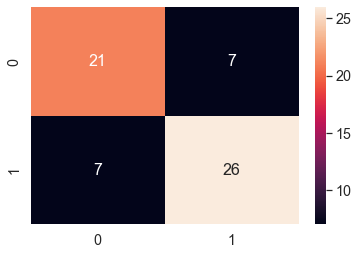

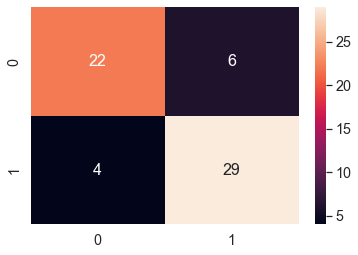

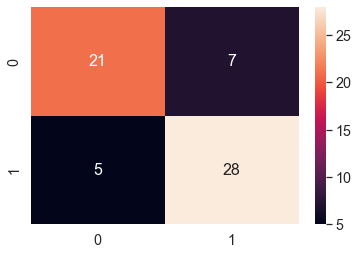

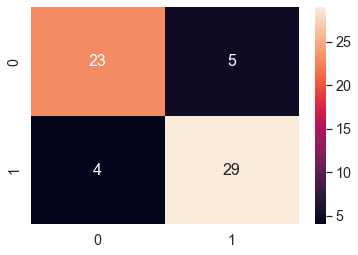

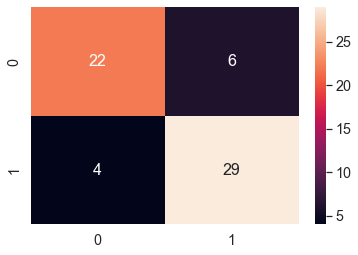

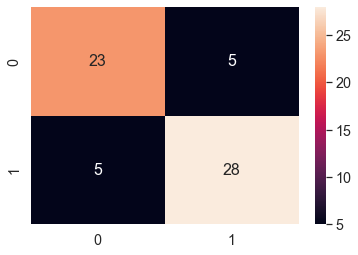

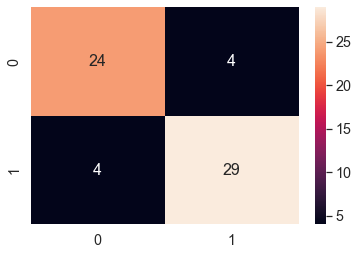

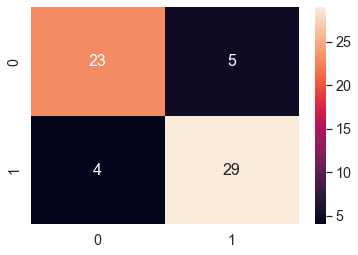

In [45]:
#---main----
p=2
for K in range(1, 16, p):
  cm = KNN(K, p, test_X, train_X, train_y, test_y)
  sn.set(font_scale=1.3) 
  sn.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='d') 
  plt.show() 

In [46]:
#Gaussian' naive bayes

KNN results:
--------------------------------------
K =  1
F1 Score:  0.7878787878787878
Accuracy:  0.7704918032786885
Recall:  0.7878787878787878
Precision:  0.7878787878787878
Specificity:  0.75
--------------------------------------
K =  3
F1 Score:  0.8529411764705883
Accuracy:  0.8360655737704918
Recall:  0.8787878787878788
Precision:  0.8285714285714286
Specificity:  0.7857142857142857
--------------------------------------
K =  5
F1 Score:  0.823529411764706
Accuracy:  0.8032786885245902
Recall:  0.8484848484848485
Precision:  0.8
Specificity:  0.75
--------------------------------------
K =  7
F1 Score:  0.8656716417910447
Accuracy:  0.8524590163934426
Recall:  0.8787878787878788
Precision:  0.8529411764705882
Specificity:  0.8214285714285714
--------------------------------------
K =  9
F1 Score:  0.8529411764705883
Accuracy:  0.8360655737704918
Recall:  0.8787878787878788
Precision:  0.8285714285714286
Specificity:  0.7857142857142857
--------------------------------------
K 

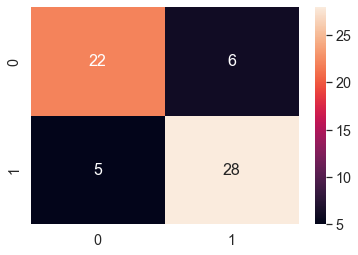

In [56]:
#----KNN results----
print("KNN results:")
for K in range(1, 16, 2):
  print("--------------------------------------")
  print("K = ", K)
  classifer = KNeighborsClassifier(K, p=2, metric='euclidean')
  classifer.fit(train_X, train_y)
  pred_y = classifer.predict(test_X)
  cm = confusion_matrix(test_y, pred_y)

  print("F1 Score: ", f1_score(test_y, pred_y))
  print("Accuracy: ", accuracy_score(test_y, pred_y))
  print("Recall: ", recall_score(test_y, pred_y))
  print("Precision: ", precision_score(test_y, pred_y))
  print("Specificity: ", cm[0][0]/(cm[0][0]+cm[0][1]))
#--naive results------
print("\n\nGausian results:")
model = GaussianNB()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

cm = metrics.confusion_matrix(test_y, pred_y)
print("F1 Score: ", f1_score(test_y, pred_y))
print("Accuracy: ", accuracy_score(test_y, pred_y))
print("Recall: ", recall_score(test_y, pred_y))
print("Precision: ", precision_score(test_y, pred_y))
print("Specificity: ", cm[0][0]/(cm[0][0]+cm[0][1]))


sn.set(font_scale=1.3) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='d') # font size
plt.show() 

In [57]:
from sklearn.feature_selection import chi2

f_p_values = chi2(X, y)

p_values = pd.Series(f_p_values[1])
p_values.index = X.columns
p_values.sort_values()

thalach     7.395102e-43
oldpeak     1.552583e-17
ca          3.605677e-16
cp          2.534982e-15
exang       4.428074e-10
chol        9.957148e-07
age         1.395673e-06
trestbps    1.180286e-04
slope       1.741237e-03
sex         5.912318e-03
thal        1.610061e-02
restecg     8.438939e-02
fbs         6.523632e-01
dtype: float64